In [1]:
%matplotlib widget

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams['figure.dpi'] = 300
plt.ioff()

In [36]:
data = {} # data[L, p, n] contains (fail_rate, samples)
for f in glob.glob('data/run_13/run_13_*.npy'):
    n = int(f.split("_")[3].split(".")[0])
    L = int(50 * ((n % 100) // 20 + 1)) # L = 50, 100, 150, 200, 250
    p_error = ((n % 20) + 400) / 100000 # p_error = 0.00400, 0.00401, 0.00402, ..., 0.00419
    if not(n == 684 or n == 337): # BAD DATA ?
        data[L, p_error, n//100] = np.load(f)

In [35]:
print(data[250, 0.00404, 6]) # 684
"""
RUN 684
Running on NVIDIA GeForce RTX 2080 Ti with 11.33 GB of VRAM.
Failure rate: 0.00926341972237824 ± 0.00019188387267996592
249260 samples for L=250 and p=0.00404 took time:
11:17:01
Actually utilized 8.79 GB of VRAM.
"""
print(data[100, 0.00417, 3]) # 337
"""
RUN 337
Running on NVIDIA GeForce RTX 2080 Ti with 11.33 GB of VRAM.
Failure rate: 0.0014177606936375613 ± 1.208828552138895e-05
9688518 samples for L=100 and p=0.00417 took time:
11:28:03
Actually utilized 8.79 GB of VRAM.
"""

[9.26341972e-03 2.49260000e+05]
[1.41776069e-03 9.68851800e+06]


In [37]:
data_array = np.empty((5, 20, 10, 2))
for i, L in enumerate([50, 100, 150, 200, 250]):
    for j, p in enumerate(np.linspace(400, 419, 20)/100000):
        for n in range(10):
            try:
                data_array[i, j, n] = data[L, p, n]
            except KeyError:
                data_array[i, j, n, 0] = np.NaN
                data_array[i, j, n, 1] = np.NaN

In [38]:
fail_rate = data_array[:, :, :, 0]
samples = data_array[:, :, :, 1]

In [39]:
fail_rate = np.nanmean(fail_rate, axis=2)
samples = np.nansum(samples, axis=2)

In [40]:
error = np.sqrt(fail_rate * (1 - fail_rate) / samples)

In [41]:
L_ticks = np.linspace(50, 250, 5).astype(int)
p_ticks = np.linspace(400, 419, 20)/100000

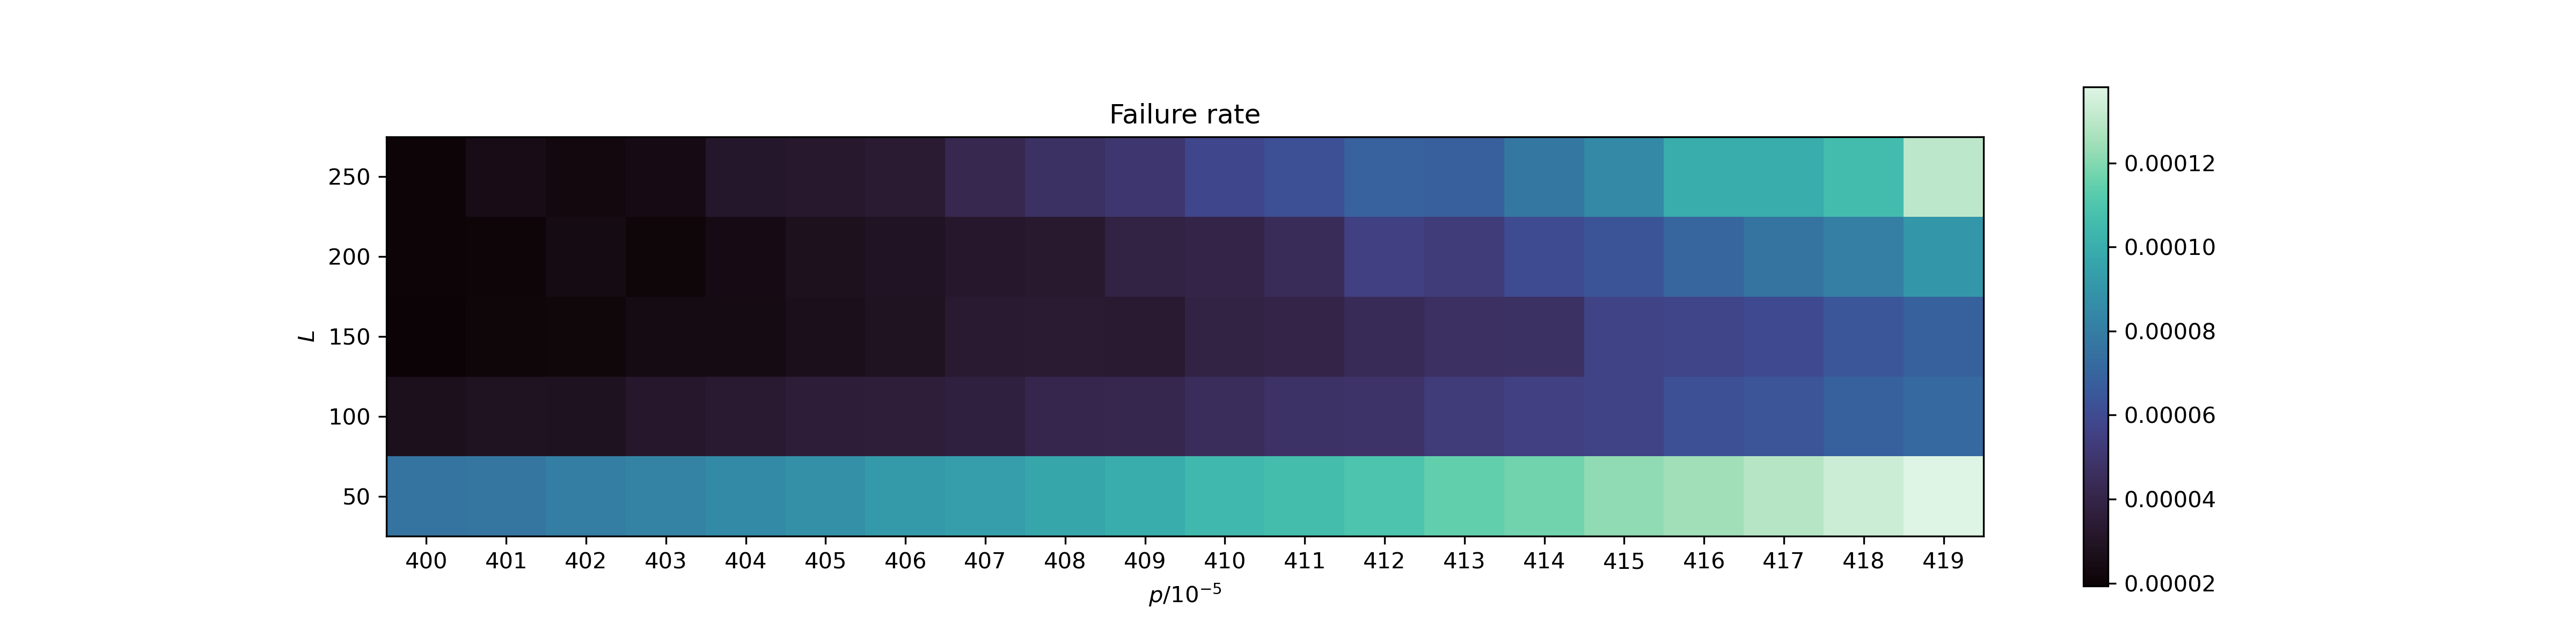

In [42]:
plt.matshow(fail_rate, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Failure rate")
plt.ylabel("$L$")
plt.xlabel(r"$p/10^{-5}$")
plt.yticks(range(L_ticks.shape[0]), L_ticks)
plt.xticks(range(p_ticks.shape[0]), np.linspace(400, 419, 20).astype(int))
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/run13_fail_heatmap.png")
plt.show()

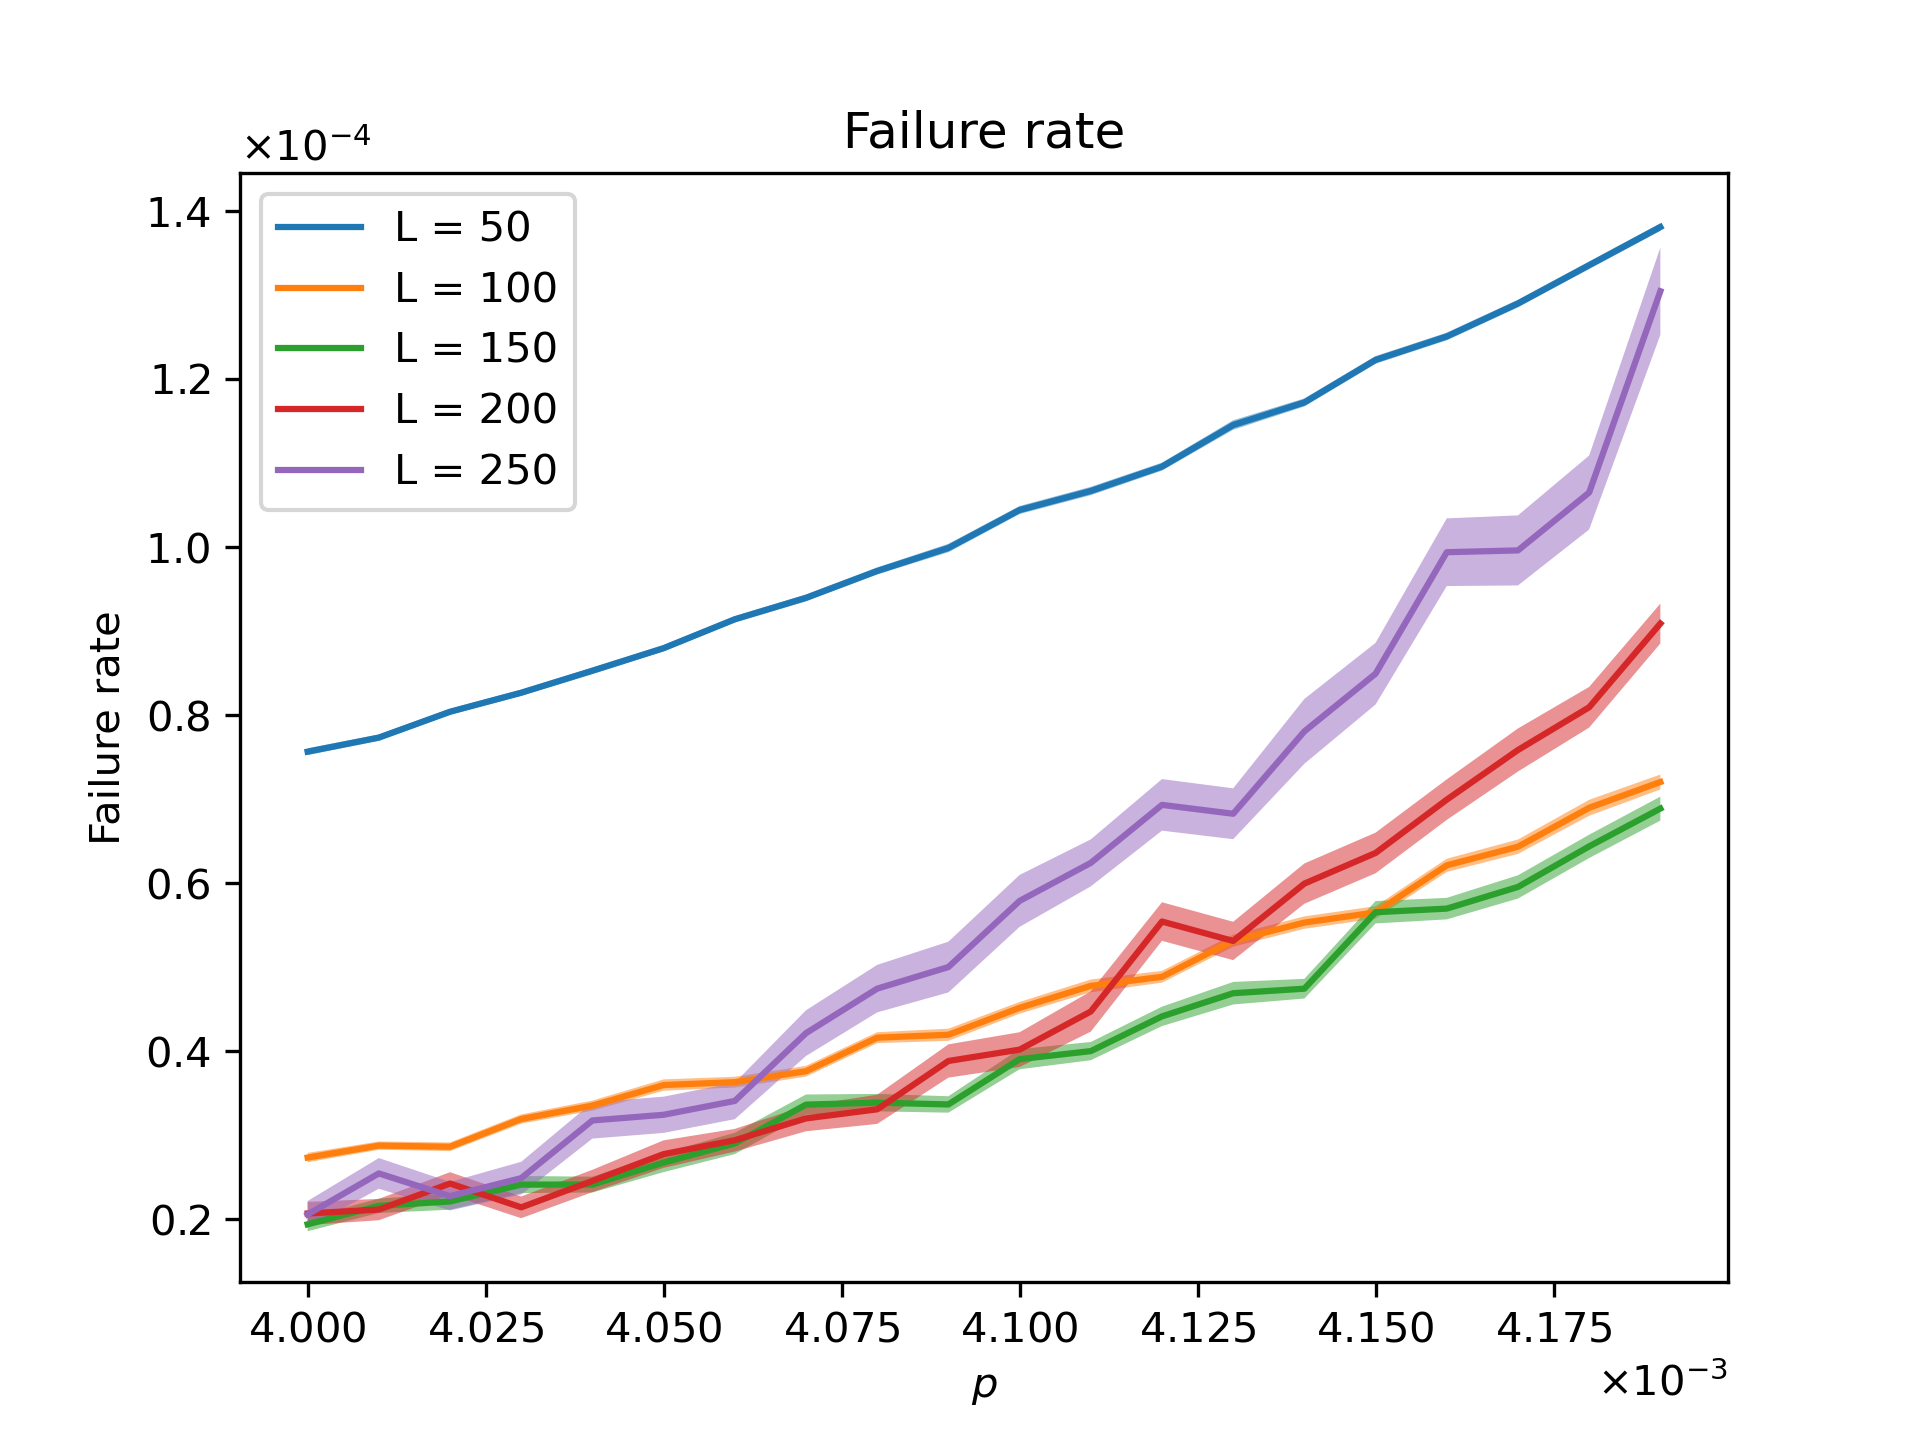

In [43]:
plt.clf()
for i, L in enumerate(L_ticks):
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    plt.fill_between(p_ticks, fail_rate[i]-error[i], fail_rate[i]+error[i], alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
# plt.xticks()
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.savefig("plots/run13_fail_linear.png")
plt.show()

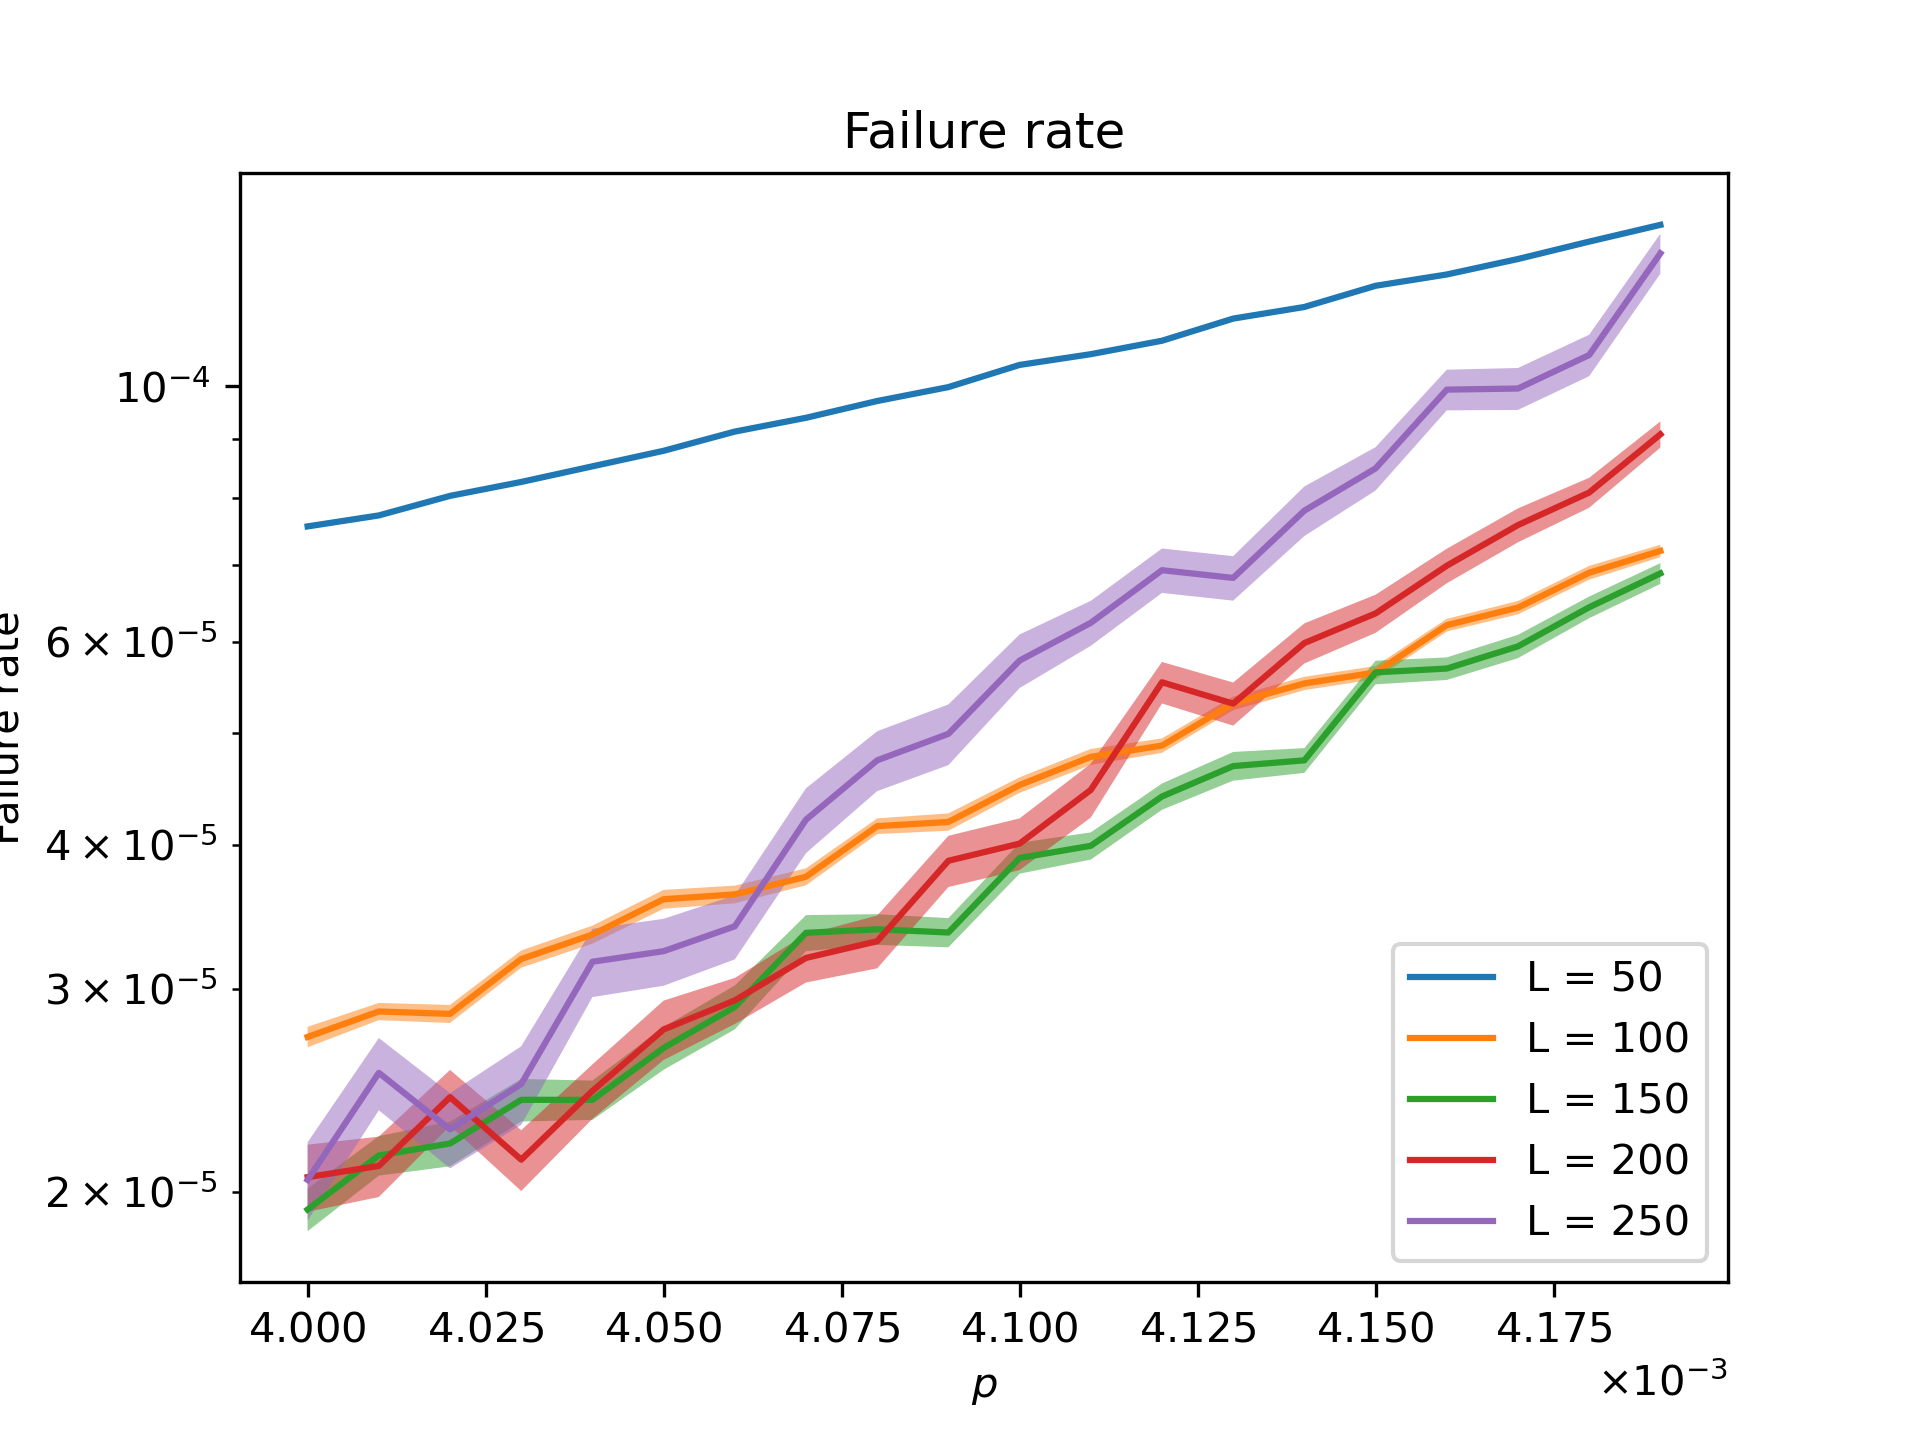

In [44]:
plt.clf()
for i, L in enumerate(L_ticks):
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    plt.fill_between(p_ticks, fail_rate[i]-error[i], fail_rate[i]+error[i], alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
plt.ticklabel_format(scilimits = (-3, 3), useMathText = True)
plt.yscale("log")
plt.savefig("plots/run13_fail_log.png")
plt.show()

In [45]:
print(fail_rate)

[[7.56120139e-05 7.72877552e-05 8.03661344e-05 8.26324739e-05
  8.52511934e-05 8.79379615e-05 9.13788893e-05 9.39304499e-05
  9.71336125e-05 9.98692440e-05 1.04393447e-04 1.06659506e-04
  1.09561151e-04 1.14516951e-04 1.17205466e-04 1.22270455e-04
  1.25063370e-04 1.28987732e-04 1.33549925e-04 1.38094544e-04]
 [2.72705047e-05 2.86940639e-05 2.85558858e-05 3.18624928e-05
  3.34598769e-05 3.59056485e-05 3.62547203e-05 3.75544639e-05
  4.15497545e-05 4.18965635e-05 4.51038445e-05 4.77152891e-05
  4.88026484e-05 5.31017455e-05 5.52560464e-05 5.64668992e-05
  6.20752990e-05 6.42919434e-05 6.89267822e-05 7.19988964e-05]
 [1.93188970e-05 2.15218892e-05 2.20424554e-05 2.40523968e-05
  2.40510654e-05 2.66772400e-05 2.89550164e-05 3.35743463e-05
  3.38115934e-05 3.35966404e-05 3.89898391e-05 3.99485951e-05
  4.40857534e-05 4.68435342e-05 4.73856169e-05 5.64880573e-05
  5.69205769e-05 5.95014714e-05 6.43341062e-05 6.88332009e-05]
 [2.06102570e-05 2.10774012e-05 2.41797992e-05 2.13413684e-05
  2.4

In [46]:
print(samples)

[[4.64682532e+08 5.38542649e+08 6.23299604e+08 5.98860341e+08
  5.67268207e+08 6.09677566e+08 6.18038544e+08 5.63824067e+08
  5.51807263e+08 4.01132534e+08 4.56320086e+08 4.35615510e+08
  4.87485662e+08 3.59325894e+08 5.16226554e+08 5.82852909e+08
  6.11060582e+08 6.08568069e+08 6.71584581e+08 6.54958604e+08]
 [8.79347120e+07 1.18221682e+08 1.08056153e+08 1.05955862e+08
  9.22964790e+07 7.86710500e+07 8.82453960e+07 9.26616930e+07
  9.85058750e+07 7.99914490e+07 9.21050240e+07 8.26844940e+07
  9.85278980e+07 1.02286183e+08 1.01452760e+08 1.02917226e+08
  1.00524348e+08 8.76214440e+07 7.60926400e+07 9.07148720e+07]
 [2.88116590e+07 2.97422050e+07 2.28412740e+07 2.30780150e+07
  2.69933410e+07 2.05717450e+07 1.79725840e+07 2.30099690e+07
  3.12934040e+07 3.51450090e+07 2.69447090e+07 3.39309960e+07
  3.29099110e+07 2.59666830e+07 3.45408900e+07 3.17754020e+07
  3.45802890e+07 3.09667700e+07 3.32882510e+07 3.37319330e+07]
 [1.08450900e+07 1.30593640e+07 1.32815530e+07 1.27391070e+07
  1.3